In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [38]:
# Set up the planet and atmosphere model.
planet=Planet("EARTH")    
planet.loadAtmosphereModel(datfile='../../atmdata/Earth/earth-gram-avg.dat', 
                           heightCol=0, tempCol=1, presCol=2, densCol=3)

In [66]:
# Set up the vehicle
vehicle=Vehicle(
    'Apollo-6', mass=5400.0, beta=400.0, LD=0.30, A=12.0, alpha=0.0, RN=3.0, planetObj=planet
)

In [87]:
# Set up entry parameters
vehicle.setInitialState(h0_km=120.0, theta0_deg=0.0,phi0_deg=0.0,
                        v0_kms=10.00, psi0_deg=0.0,gamma0_deg=-6.00, 
                        drange0_km=0.0, heatLoad0=0.0)

In [88]:
# Set up solver
vehicle.setSolverParams(1E-6)

In [89]:
# propogate the entry trajectory with small lift up
vehicle.propogateEntry(t_sec=2400.0, dt=0.1, delta_deg=70)

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

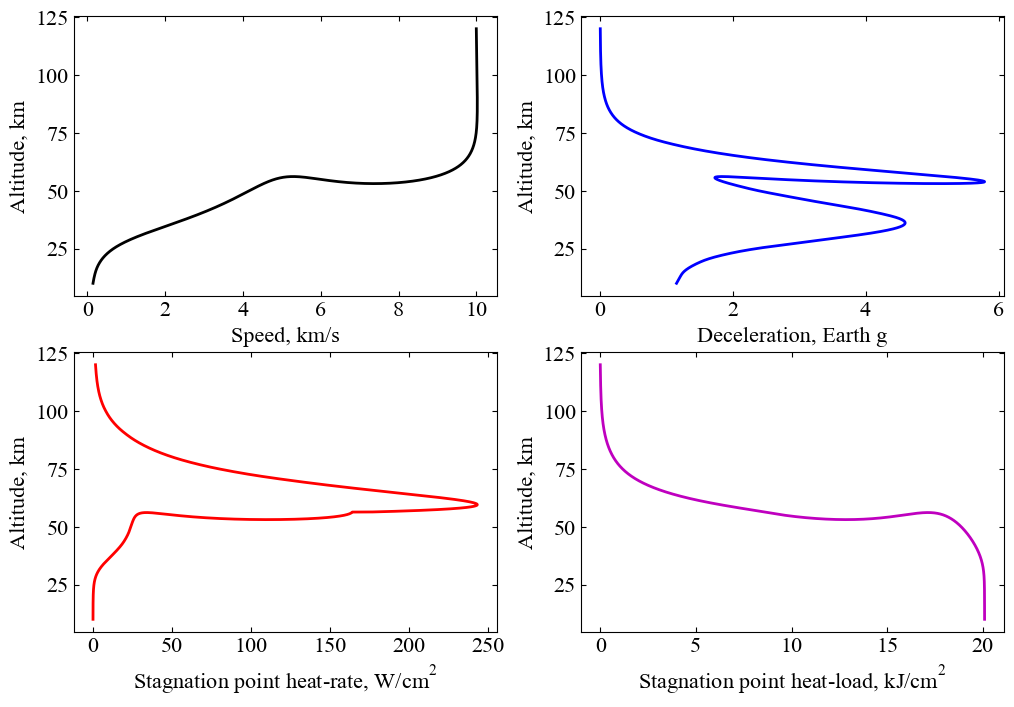

In [91]:
fig = plt.figure(figsize=(12, 8))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(vehicle.v_kmsc, vehicle.h_kmc, 'k-', linewidth=2.0)
plt.xlabel('Speed, km/s',fontsize=16)
plt.ylabel('Altitude, km', fontsize=16)
ax1=plt.gca()

plt.subplot(2, 2, 2)
plt.plot(vehicle.acc_net_g, vehicle.h_kmc, 'b-', linewidth=2.0)
plt.xlabel('Deceleration, Earth g',fontsize=16)
plt.ylabel('Altitude, km', fontsize=16)
ax2=plt.gca()

plt.subplot(2, 2, 3)
plt.plot(vehicle.q_stag_total, vehicle.h_kmc,'r-', linewidth=2.0)
plt.xlabel('Stagnation point heat-rate, '+r'$W/cm^2$',fontsize=16)
plt.ylabel('Altitude, km', fontsize=16)
ax3=plt.gca()

plt.subplot(2, 2, 4)
plt.plot(vehicle.heatload/1.0E3, vehicle.h_kmc, 'm-', linewidth=2.0)
plt.xlabel('Stagnation point heat-load, '+r'$kJ/cm^2$',fontsize=16)
plt.ylabel('Altitude, km', fontsize=16)
ax4=plt.gca()


for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(direction='in')
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(axis='x',labelsize=16)
    ax.tick_params(axis='y',labelsize=16)
    
plt.savefig('../../plots/apollo-entry.png', dpi=300, bbox_inches='tight')

plt.show()